In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Initial Analysis of the Data Structure

In [2]:
path_users = 'Data/raw/users.csv'
path_viewing = 'Data/raw/viewing_sessions.csv'
path_content = 'Data/raw/content.json'

# Cargar datasets
df_users = pd.read_csv(path_users)
df_viewing = pd.read_csv(path_viewing)

with open(path_content, 'r') as f:
    data_content = json.load(f)

# Crear DataFrames de contenido
movies_list = data_content['movies']
series_list = data_content['series']
df_movies = pd.DataFrame(movies_list)
df_series = pd.DataFrame(series_list)

print("DataFrames cargados exitosamente")
print(f"Usuarios: {len(df_users):,} registros")
print(f"Sesiones de visualización: {len(df_viewing):,} registros")
print(f"Películas: {len(df_movies):,} registros")
print(f"Series: {len(df_series):,} registros")

DataFrames cargados exitosamente
Usuarios: 5,000 registros
Sesiones de visualización: 222,785 registros
Películas: 200 registros
Series: 100 registros


In [3]:
def analyze_dataframe(df, name):
    print(f"\n{'='*60}")
    print(f"ANÁLISIS DE {name.upper()}")
    print(f"{'='*60}")
    
    print(f"Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
    print(f"\nInformación general:")
    df.info()
    
    print(f"\nPrimeros 5 registros:")
    display(df.head())
    
    print(f"\nEstadísticas descriptivas:")
    display(df.describe(include='all'))
    
    print(f"\nValores nulos:")
    null_counts = df.isnull().sum()
    null_percentages = (df.isnull().sum() / len(df)) * 100
    null_info = pd.DataFrame({
        'Valores_Nulos': null_counts,
        'Porcentaje': null_percentages
    })
    display(null_info[null_info['Valores_Nulos'] > 0])
    
    if null_info['Valores_Nulos'].sum() == 0:
        print("No se encontraron valores nulos")

# Analizar cada dataset
analyze_dataframe(df_users, "USUARIOS")
analyze_dataframe(df_viewing, "SESIONES DE VISUALIZACIÓN")
analyze_dataframe(df_movies, "PELÍCULAS")
analyze_dataframe(df_series, "SERIES")


ANÁLISIS DE USUARIOS
Dimensiones: 5,000 filas × 6 columnas

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   country                 5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   registration_date       5000 non-null   object 
 5   total_watch_time_hours  5000 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 234.5+ KB

Primeros 5 registros:


,user_id,age,country,subscription_type,registration_date,total_watch_time_hours
0,U0001,21,Argentina,Basic,2022-10-02,58.0
1,U0002,44,Mexico,Standard,2022-09-30,75.3
2,U0003,20,Argentina,Standard,2023-01-24,360.0
3,U0004,39,Peru,Standard,2022-12-15,513.0
4,U0005,28,Colombia,Basic,2022-05-19,192.8



Estadísticas descriptivas:


,user_id,age,country,subscription_type,registration_date,total_watch_time_hours
count,5000,5000.000000,5000,5000,5000,5000.000000
unique,5000,NaN,5,3,785,NaN
top,U0001,NaN,Mexico,Basic,2024-01-24,NaN
freq,1,NaN,1514,2003,15,NaN
mean,NaN,41.591000,NaN,NaN,NaN,335.041380
std,NaN,13.927746,NaN,NaN,NaN,220.023813
min,NaN,18.000000,NaN,NaN,NaN,9.800000
25%,NaN,30.000000,NaN,NaN,NaN,163.900000
50%,NaN,42.000000,NaN,NaN,NaN,312.350000
75%,NaN,54.000000,NaN,NaN,NaN,455.400000



Valores nulos:


,Valores_Nulos,Porcentaje


No se encontraron valores nulos

ANÁLISIS DE SESIONES DE VISUALIZACIÓN
Dimensiones: 222,785 filas × 8 columnas

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222785 entries, 0 to 222784
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              222785 non-null  object 
 1   user_id                 222785 non-null  object 
 2   content_id              222785 non-null  object 
 3   watch_date              222785 non-null  object 
 4   watch_duration_minutes  222785 non-null  int64  
 5   completion_percentage   222785 non-null  float64
 6   device_type             222785 non-null  object 
 7   quality_level           222785 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.6+ MB

Primeros 5 registros:


,session_id,user_id,content_id,watch_date,watch_duration_minutes,completion_percentage,device_type,quality_level
0,S000001,U0001,S001,2024-02-16,9,18.8,Desktop,4K
1,S000002,U0001,M110,2024-08-06,30,23.6,Smart TV,SD
2,S000003,U0001,S005,2024-03-20,18,65.3,Desktop,4K
3,S000004,U0001,M105,2024-02-24,77,74.4,Mobile,HD
4,S000005,U0001,M148,2024-08-18,47,30.1,Smart TV,4K



Estadísticas descriptivas:


,session_id,user_id,content_id,watch_date,watch_duration_minutes,completion_percentage,device_type,quality_level
count,222785,222785,222785,222785,222785.000000,222785.000000,222785,222785
unique,222785,5000,300,244,NaN,NaN,5,3
top,S000001,U1570,S040,2024-04-03,NaN,NaN,Smart TV,HD
freq,1,104,1321,1014,NaN,NaN,79803,109286
mean,NaN,NaN,NaN,NaN,78.907871,78.384990,NaN,NaN
std,NaN,NaN,NaN,NaN,45.007097,21.462752,NaN,NaN
min,NaN,NaN,NaN,NaN,2.000000,10.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,37.000000,66.300000,NaN,NaN
50%,NaN,NaN,NaN,NaN,79.000000,84.500000,NaN,NaN
75%,NaN,NaN,NaN,NaN,115.000000,96.000000,NaN,NaN



Valores nulos:


,Valores_Nulos,Porcentaje


No se encontraron valores nulos

ANÁLISIS DE PELÍCULAS
Dimensiones: 200 filas × 8 columnas

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   content_id         200 non-null    object 
 1   title              200 non-null    object 
 2   genre              200 non-null    object 
 3   duration_minutes   200 non-null    int64  
 4   release_year       200 non-null    int64  
 5   rating             200 non-null    float64
 6   views_count        200 non-null    int64  
 7   production_budget  200 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 12.6+ KB

Primeros 5 registros:


,content_id,title,genre,duration_minutes,release_year,rating,views_count,production_budget
0,M001,Advanced World,"[Sci-Fi, Horror, Drama]",179,2020,3.5,66721,220088717
1,M002,Neural Signal,"[Animation, Horror]",146,2021,2.8,11128,23593231
2,M003,An Stream,[Action],102,2023,1.9,75949,83166461
3,M004,Binary Journey,"[Thriller, Documentary]",146,2022,3.0,85958,46298444
4,M005,Lost Data,"[Horror, Romance]",169,2022,4.7,56808,67293750



Estadísticas descriptivas:


,content_id,title,genre,duration_minutes,release_year,rating,views_count,production_budget
count,200,200,200,200.000000,200.000000,200.000000,200.000000,2.000000e+02
unique,200,137,129,NaN,NaN,NaN,NaN,NaN
top,M001,System,[Horror],NaN,NaN,NaN,NaN,NaN
freq,1,6,11,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,132.450000,2022.025000,2.985500,76560.740000,1.041157e+08
std,NaN,NaN,NaN,27.920337,1.339157,1.117265,57071.017178,9.012590e+07
min,NaN,NaN,NaN,81.000000,2020.000000,1.100000,1988.000000,1.600669e+06
25%,NaN,NaN,NaN,107.750000,2021.000000,2.000000,37738.750000,2.707525e+07
50%,NaN,NaN,NaN,136.000000,2022.000000,2.950000,64716.000000,6.808608e+07
75%,NaN,NaN,NaN,155.000000,2023.000000,3.925000,106297.000000,1.831148e+08



Valores nulos:


,Valores_Nulos,Porcentaje


No se encontraron valores nulos

ANÁLISIS DE SERIES
Dimensiones: 100 filas × 9 columnas

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   content_id            100 non-null    object 
 1   title                 100 non-null    object 
 2   genre                 100 non-null    object 
 3   seasons               100 non-null    int64  
 4   episodes_per_season   100 non-null    object 
 5   avg_episode_duration  100 non-null    int64  
 6   rating                100 non-null    float64
 7   total_views           100 non-null    int64  
 8   production_budget     100 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 7.2+ KB

Primeros 5 registros:


,content_id,title,genre,seasons,episodes_per_season,avg_episode_duration,rating,total_views,production_budget
0,S001,The Investigators,[Crime],7,"[8, 14, 7, 17, 12, 13, 18]",50,1.3,50315,44041273
1,S002,The Investigators,[Sci-Fi],7,"[16, 12, 14, 14, 23, 9, 24]",20,4.4,351932,126866932
2,S003,System Archives,[Documentary],4,"[9, 7, 21, 14]",44,2.8,78137,56625408
3,S004,Cyber Archives,"[Comedy, Romance]",2,"[8, 6]",58,2.2,58071,47182636
4,S005,The Scientists,"[Action, Drama]",5,"[22, 14, 6, 14, 9]",29,4.4,76998,327965922



Estadísticas descriptivas:


,content_id,title,genre,seasons,episodes_per_season,avg_episode_duration,rating,total_views,production_budget
count,100,100,100,100.000000,100,100.000000,100.000000,100.000000,1.000000e+02
unique,100,51,44,NaN,100,NaN,NaN,NaN,NaN
top,S001,The Analysts,[Crime],NaN,"[8, 14, 7, 17, 12, 13, 18]",NaN,NaN,NaN,NaN
freq,1,9,12,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.700000,NaN,42.570000,2.938000,128694.860000,1.484665e+08
std,NaN,NaN,NaN,2.171905,NaN,11.447954,1.186607,84241.598071,1.505800e+08
min,NaN,NaN,NaN,1.000000,NaN,20.000000,1.000000,11044.000000,5.130193e+06
25%,NaN,NaN,NaN,3.000000,NaN,34.750000,1.875000,62678.000000,3.615000e+07
50%,NaN,NaN,NaN,5.000000,NaN,42.500000,2.900000,114519.000000,7.141248e+07
75%,NaN,NaN,NaN,6.250000,NaN,52.000000,4.025000,174851.000000,2.409783e+08



Valores nulos:


,Valores_Nulos,Porcentaje


No se encontraron valores nulos


## Preparation and Merging of Datasets

In [4]:
df_movies['content_type'] = 'movie'
df_series['content_type'] = 'series'

# Estandarizar columnas para unión
movies_standardized = df_movies[['content_id', 'title', 'genre', 'rating', 'content_type']].copy()
movies_standardized['duration'] = df_movies['duration_minutes']
movies_standardized['views'] = df_movies['views_count']
movies_standardized['budget'] = df_movies['production_budget']

series_standardized = df_series[['content_id', 'title', 'genre', 'rating', 'content_type']].copy()
series_standardized['duration'] = df_series['avg_episode_duration']
series_standardized['views'] = df_series['total_views']
series_standardized['budget'] = df_series['production_budget']

# Combinar contenido
df_content = pd.concat([movies_standardized, series_standardized], ignore_index=True)

print("Dataset de contenido consolidado creado")
print(f"Total contenido: {len(df_content):,} registros")
print(f"   - Películas: {len(df_content[df_content['content_type']=='movie']):,}")
print(f"   - Series: {len(df_content[df_content['content_type']=='series']):,}")

Dataset de contenido consolidado creado
Total contenido: 300 registros
   - Películas: 200
   - Series: 100


In [5]:
df_users['registration_date'] = pd.to_datetime(df_users['registration_date'])
df_viewing['watch_date'] = pd.to_datetime(df_viewing['watch_date'])
print("Columnas de fecha convertidas a formato datetime.")

# Crear dataset principal uniendo todas las fuentes
df_main = df_viewing.merge(df_users, on='user_id', how='left')
df_main = df_main.merge(df_content, on='content_id', how='left')

print("Dataset principal creado mediante joins")
print(f"Registros totales: {len(df_main):,}")
print(f"Columnas: {df_main.columns.tolist()}")

print(f"\nVerificación de integridad:")
print(f"   - Usuarios sin match: {df_main['age'].isnull().sum():,}")
print(f"   - Contenido sin match: {df_main['title'].isnull().sum():,}")

Columnas de fecha convertidas a formato datetime.
Dataset principal creado mediante joins
Registros totales: 222,785
Columnas: ['session_id', 'user_id', 'content_id', 'watch_date', 'watch_duration_minutes', 'completion_percentage', 'device_type', 'quality_level', 'age', 'country', 'subscription_type', 'registration_date', 'total_watch_time_hours', 'title', 'genre', 'rating', 'content_type', 'duration', 'views', 'budget']

Verificación de integridad:
   - Usuarios sin match: 0
   - Contenido sin match: 0


In [6]:
age_bins = pd.cut(df_main['age'], bins=[17, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
df_main['age_group'] = age_bins

# Crear una versión del DataFrame con los géneros desagregados en filas separadas
df_main_exploded = df_main.explode('genre')


## Analysis of Categorical Variables

In [7]:
def plot_categorical_analysis(df, columns, figsize=(15, 12)):
    n_cols = len(columns)
    n_rows = (n_cols + 1) // 2
    
    fig, axes = plt.subplots(n_rows, 2, figsize=figsize)
    
    if n_rows == 1 and len(columns) == 1:
        axes = [axes[0]]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.flatten()
    
    paleta_personalizada = 'viridis' 
    
    for i, col in enumerate(columns):
        if i < len(axes):
            # Obtener los valores más frecuentes
            value_counts = df[col].value_counts().head(10)
            
            sns.countplot(data=df, y=col, order=value_counts.index, ax=axes[i], palette=paleta_personalizada)
            
            axes[i].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
            axes[i].set_xlabel('Frecuencia')
            
            # Agregar porcentajes (sin cambios)
            total = len(df)
            for j, v in enumerate(value_counts):
                axes[i].text(v + total*0.01, j, f'{v:,} ({v/total*100:.1f}%)', 
                              va='center', fontsize=9)
    
    # Ocultar ejes extra (sin cambios)
    for i in range(len(columns), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

ANÁLISIS DE VARIABLES CATEGÓRICAS - USUARIOS


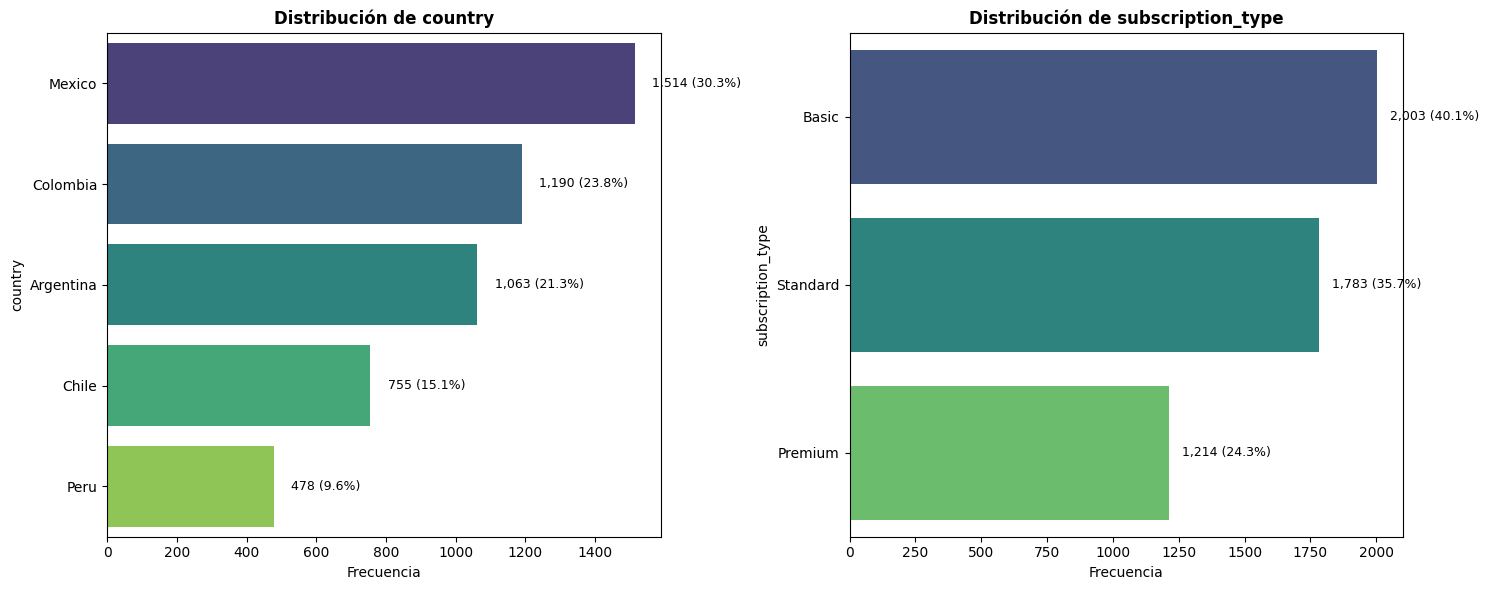

In [8]:
print("ANÁLISIS DE VARIABLES CATEGÓRICAS - USUARIOS")
print("="*60)

categorical_user_cols = ['country', 'subscription_type']
plot_categorical_analysis(df_users, categorical_user_cols, figsize=(15, 6))

1. This graph shows the frequency and percentage of the top five countries in the dataset.
* Mexico is the most represented country, with 1,514 entries, making up 30.3% of the visible data.
* Peru is the least represented among the top five, with 478 entries, or 9.6%.

2. This graph illustrates the distribution of user subscription types.
* The Basic subscription type is the most common, with 2,003 instances, accounting for 40.1% of the subscriptions.
* The Standard subscription is the second most frequent, with 1,783 instances, representing 35.7%.
* The Premium subscription is the least common type shown, with 1,214 instances, making up 24.3%.




ANÁLISIS DE VARIABLES CATEGÓRICAS - SESIONES


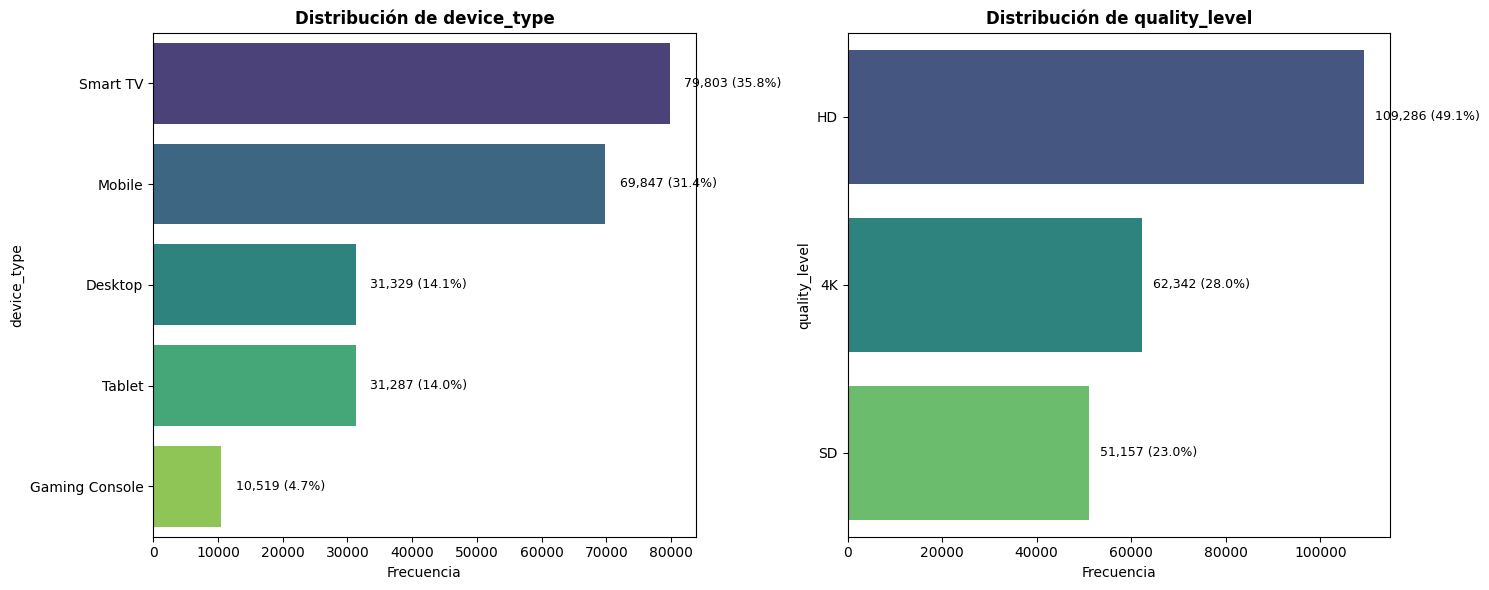

In [9]:
print("\nANÁLISIS DE VARIABLES CATEGÓRICAS - SESIONES")
print("="*60)

categorical_session_cols = ['device_type', 'quality_level']
plot_categorical_analysis(df_viewing, categorical_session_cols, figsize=(15, 6))

1. This graph displays the frequency and percentage of different devices used by customers.
* Smart TV is the most dominant device, with 79,803 entries, accounting for 35.8% of the data.
* Gaming Console is the least used device category, with 10,519 entries, making up only 4.7%.

2. This graph shows the distribution of the different quality levels being used or selected.
* HD (High Definition) is the most popular quality level by a significant margin, with 109,286 instances, representing almost half of the data at 49.1%.
* 4K is the second most frequent level, with 62,342 instances, which is 28.0%.
* SD (Standard Definition) is the least common quality level shown, with 51,157 instances, accounting for 23.0%.

In [10]:
def plot_numerical_analysis(df, columns, figsize=(15, 20)):
    n_cols = len(columns)
    
    fig, axes = plt.subplots(n_cols, 2, figsize=figsize)
    
    if n_cols == 1:
        axes = axes.reshape(1, -1)  
    
    for i, col in enumerate(columns):
        # Histogram
        axes[i, 0].hist(df[col].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i, 0].set_title(f'Distribución de {col}', fontweight='bold')
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel('Frecuencia')
        axes[i, 0].grid(True, alpha=0.3)
        
        # Boxplot
        sns.boxplot(y=df[col].dropna(), ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot de {col}', fontweight='bold')
        axes[i, 1].set_ylabel(col)
        axes[i, 1].grid(True, alpha=0.3)
        
        # Estadísticas descriptivas en el gráfico
        stats_text = f"""Media: {df[col].mean():.2f}
Mediana: {df[col].median():.2f}
Std: {df[col].std():.2f}
Min: {df[col].min():.2f}
Max: {df[col].max():.2f}"""
        
        axes[i, 0].text(0.7, 0.7, stats_text, transform=axes[i, 0].transAxes, 
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                       verticalalignment='top', fontsize=8)
    
    plt.tight_layout()
    plt.show()

ANÁLISIS DE VARIABLES NUMÉRICAS - USUARIOS


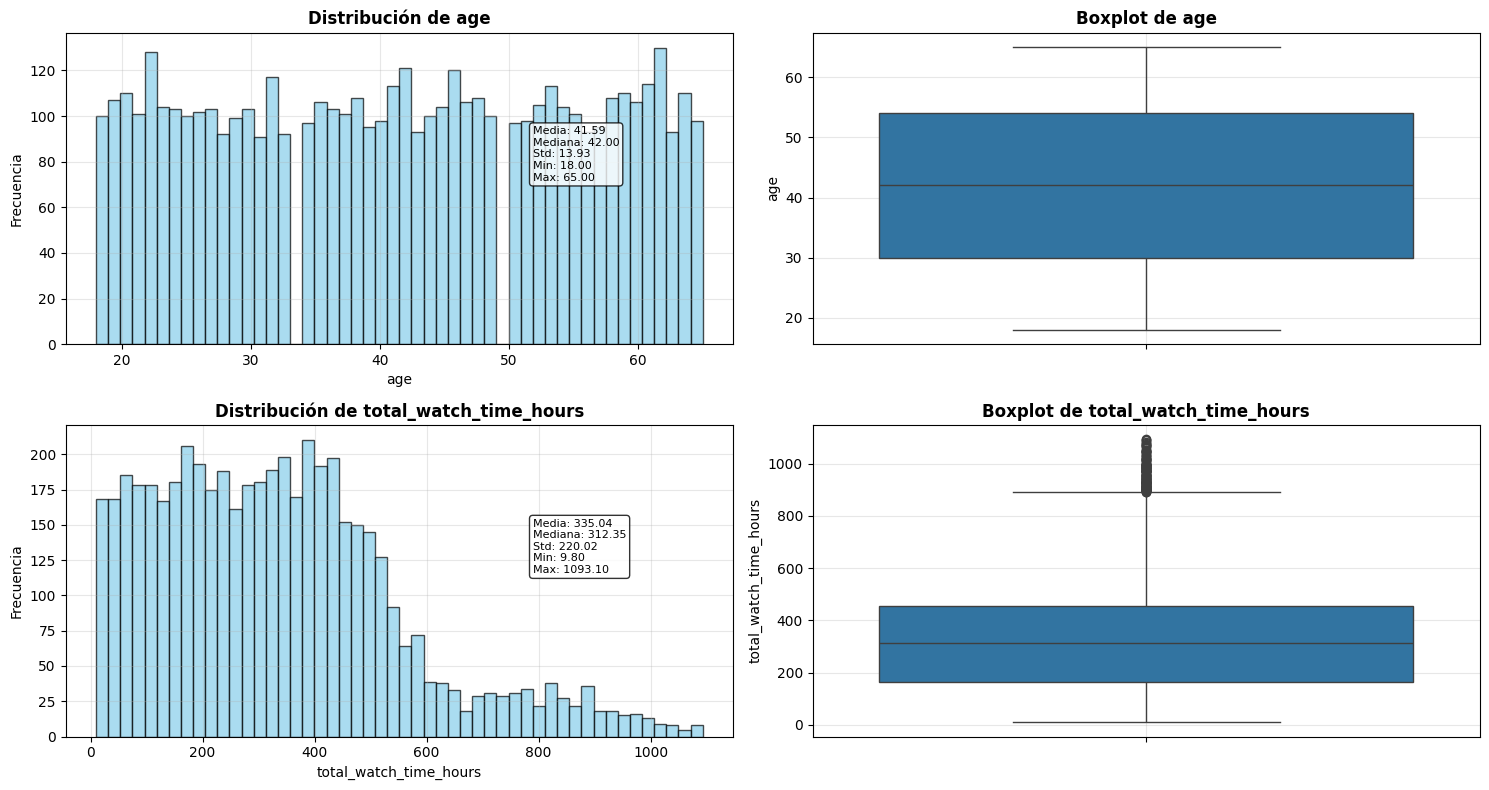

In [11]:
print("ANÁLISIS DE VARIABLES NUMÉRICAS - USUARIOS")
print("="*60)

numerical_user_cols = ['age', 'total_watch_time_hours']
plot_numerical_analysis(df_users, numerical_user_cols, figsize=(15, 8))

1. Distribution and Boxplot of age
* The age distribution is remarkably uniform (flat) across the entire range shown (approximately 20 to 65). This suggests that customers are equally distributed across all age groups, with no single age bracket dominating the user base.
* The boxplot reinforces the uniform distribution: • Median is 42.00. • The middle 50% of users (the box, from Q1 to Q3) spans a wide range, from about 30 to 55 years old. • The data is symmetrical with no significant outliers detected (or they are very close to the whiskers). • Statistical summary: Mean: 41.59, Std: 13.93, Min: 18.00, Max: 65.00.

2. Distribution and Boxplot of total_watch_time_hours
* 	This variable shows a right-skewed distribution. Most users have a lower total watch time, clustering around 0 to 400 hours. The frequency rapidly decreases as the watch time increases, with very few users having high watch times (above 800 hours).
* • The most notable feature is the large number of outliers (the dots above the upper whisker), which represent a small group of users with extremely high total watch times (some exceeding 1,000 hours). • Statistical summary: Mean: 335.04, Std: 220.02, Min: 0.00, Max: 1093.10.



ANÁLISIS DE VARIABLES NUMÉRICAS - SESIONES


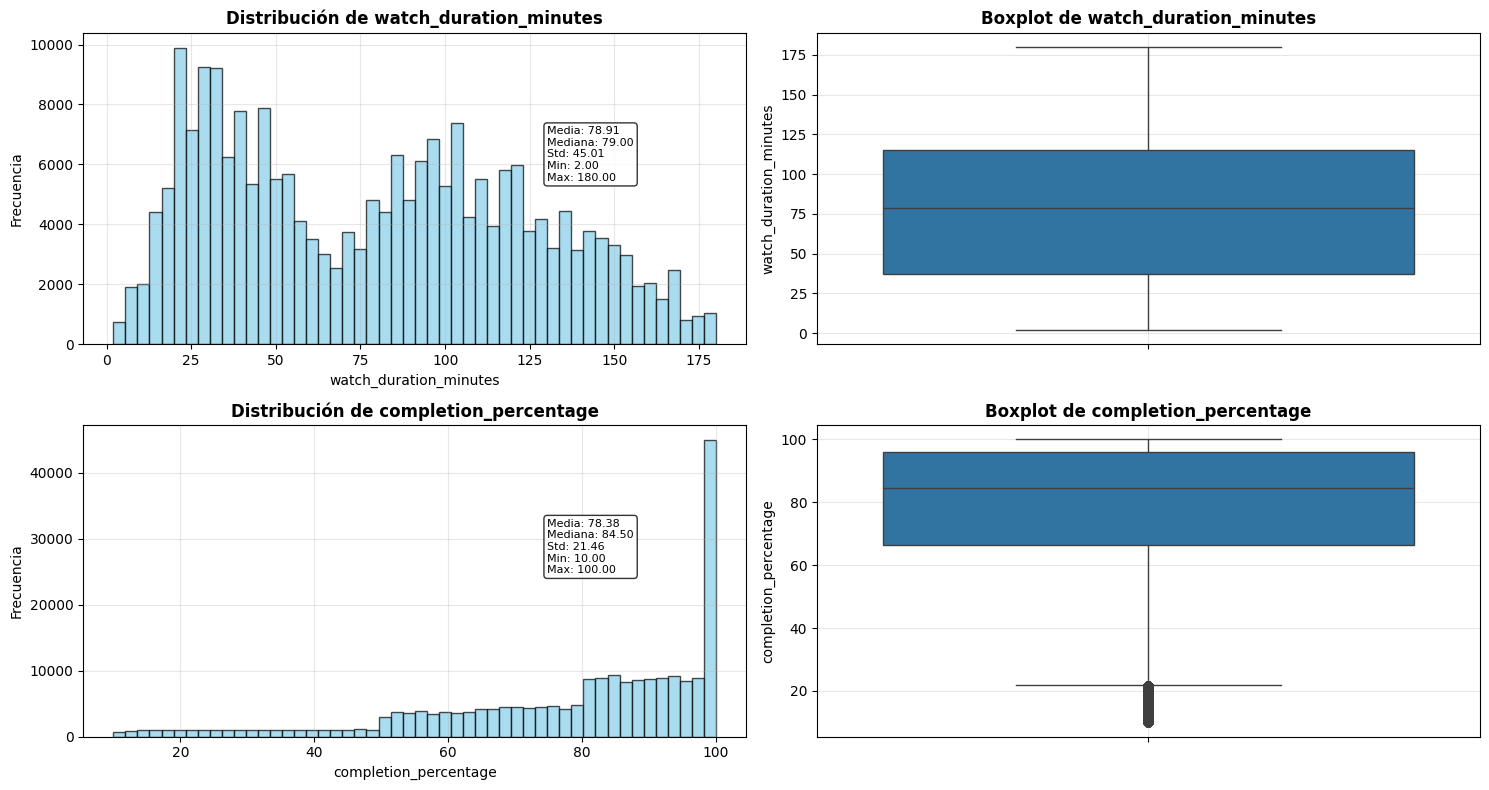

In [12]:
print("\nANÁLISIS DE VARIABLES NUMÉRICAS - SESIONES")
print("="*60)

numerical_session_cols = ['watch_duration_minutes', 'completion_percentage']
plot_numerical_analysis(df_viewing, numerical_session_cols, figsize=(15, 8))

1. Distribution and Boxplot of watch_duration_minutes
* The distribution is complex and bimodal (has two peaks). • There's a clear first peak around 15–20 minute. • A second, broader peak is visible around 80–120 minutes. • The distribution is generally spread out, covering the range up to approximately 175 minutes.
* The plot shows a slightly symmetrical distribution around the median, and importantly, there are no significant outliers detected, suggesting that the maximum recorded watch duration is close to the expected upper limit.
2. Distribution and Boxplot of completion_percentage
* A significant majority of viewing sessions end in 100% completion, as evidenced by the towering bar at the far right. • There's a very low frequency of abandoned views in the 0% to 80% range, with a slight increase in frequency as the percentage approaches 100%. This indicates that most content being started is completed.
* The most notable feature is the presence of numerous low-value outliers. These represent the small fraction of users who start content but quit very quickly (near 0% completion). 

## Content Analysis

ANÁLISIS DE CONTENIDO


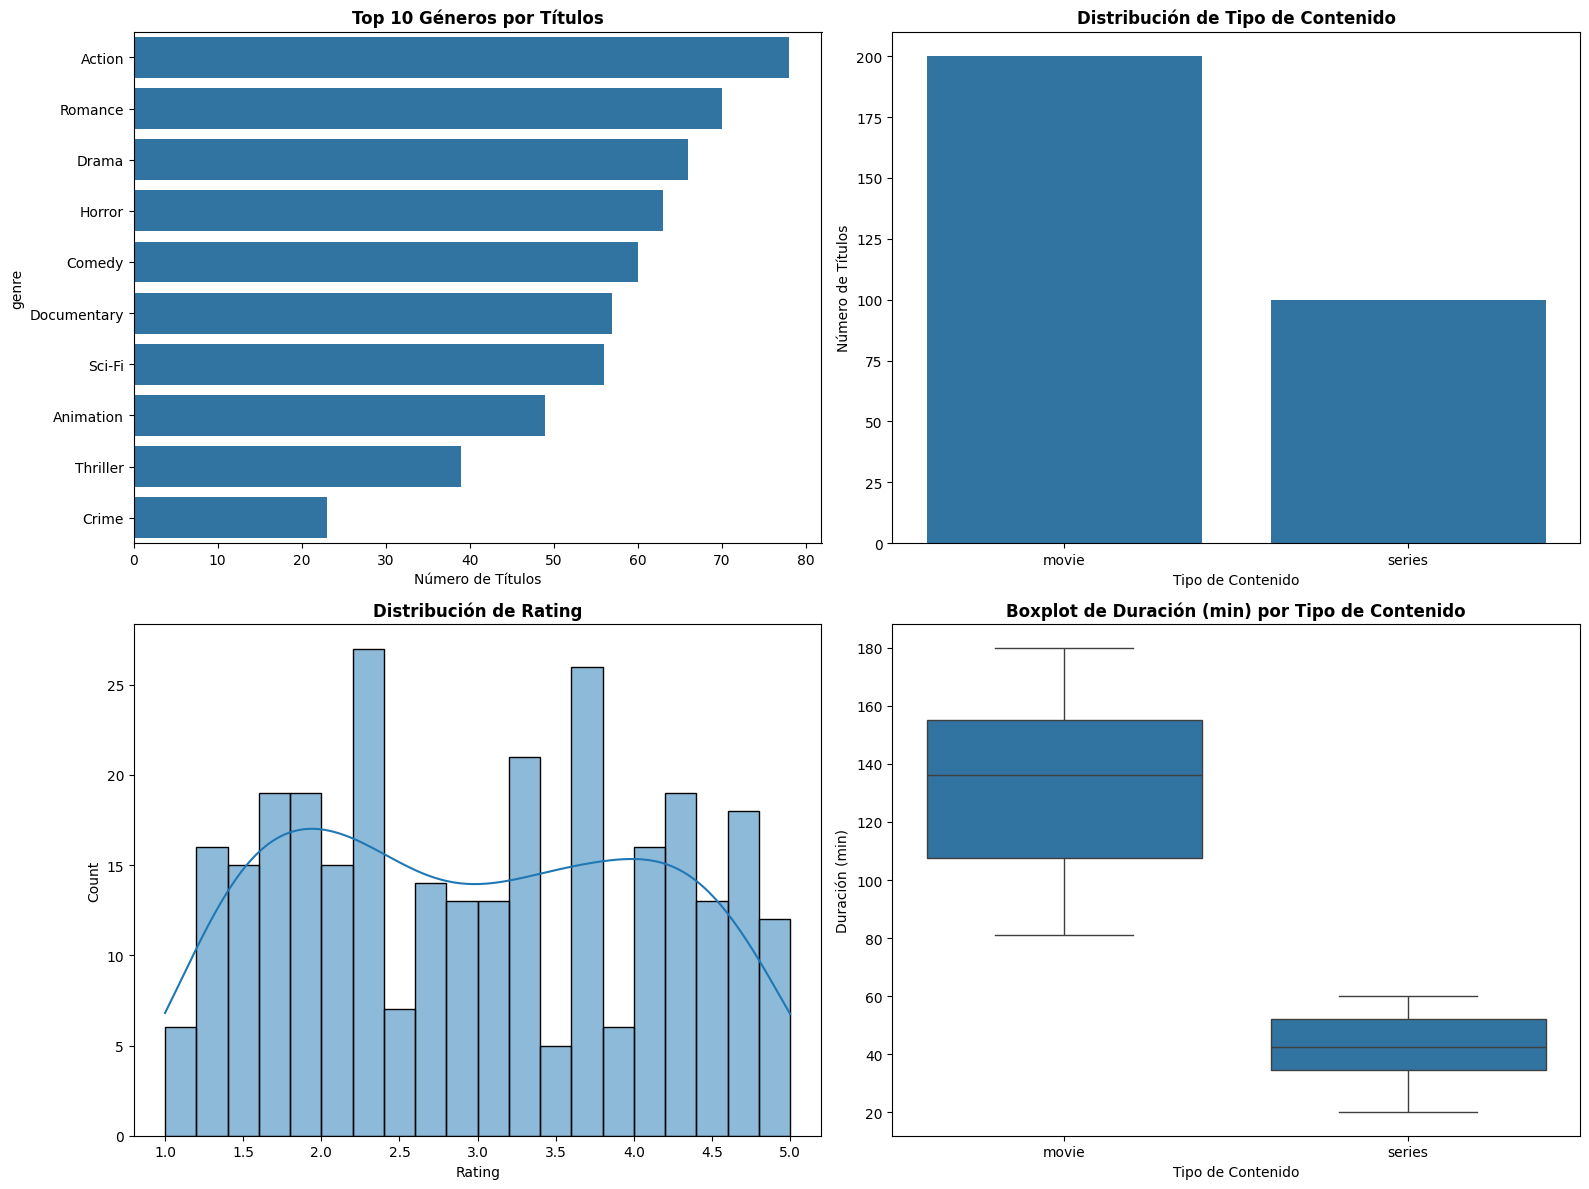

In [13]:
print("ANÁLISIS DE CONTENIDO")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Desagregar la lista de géneros a filas individuales
df_genres_exploded = df_content.explode('genre')

# 1. Distribución de géneros
genre_counts = df_genres_exploded['genre'].value_counts().head(10)

sns.barplot(x=genre_counts.values, y=genre_counts.index, ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Géneros por Títulos', fontweight='bold')
axes[0, 0].set_xlabel('Número de Títulos')

# 2. Distribución de Tipo de Contenido
content_counts = df_content['content_type'].value_counts()
sns.barplot(x=content_counts.index, y=content_counts.values, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Tipo de Contenido', fontweight='bold')
axes[0, 1].set_xlabel('Tipo de Contenido')
axes[0, 1].set_ylabel('Número de Títulos')

# 3. Distribución de Rating
sns.histplot(df_content['rating'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Rating', fontweight='bold')
axes[1, 0].set_xlabel('Rating')

# 4. Boxplot de Duración
sns.boxplot(y=df_content['duration'], x=df_content['content_type'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot de Duración (min) por Tipo de Contenido', fontweight='bold')
axes[1, 1].set_ylabel('Duración (min)')
axes[1, 1].set_xlabel('Tipo de Contenido')

plt.tight_layout()
plt.show()

1. Top 10 Genres
* Action is the most frequent genre, followed very closely by Romance. Both have approximately 75 titles.
2. Content Type Distribution (Top-Right)
* Movies are the predominant content type, with approximately 200 titles.
* Series are significantly less frequent, with approximately 100 titles.
3. Rating Distribution
* The distribution is quite spread out and multimodal, meaning there's no single rating that is clearly the most common.
* There are notable peaks in the frequency (Count) around ratings of 2.0, 4.0, and near 5.0.
* This pattern suggests content is rated highly or very highly, with a significant number of titles receiving a rating around 2.0 as well.
4. Duration Boxplot by Content Type
* Movies: The duration is much longer, with a median around 140 minutes. The middle 50% of movies (the box) have durations ranging from approximately 110 minutes to 155 minutes.
* Series: The duration is much shorter, with a median around 45 minutes. The middle 50% of series episodes (or average duration) ranges from approximately 40 minutes to 55 minutes

## Temporal Analysis

ANÁLISIS TEMPORAL


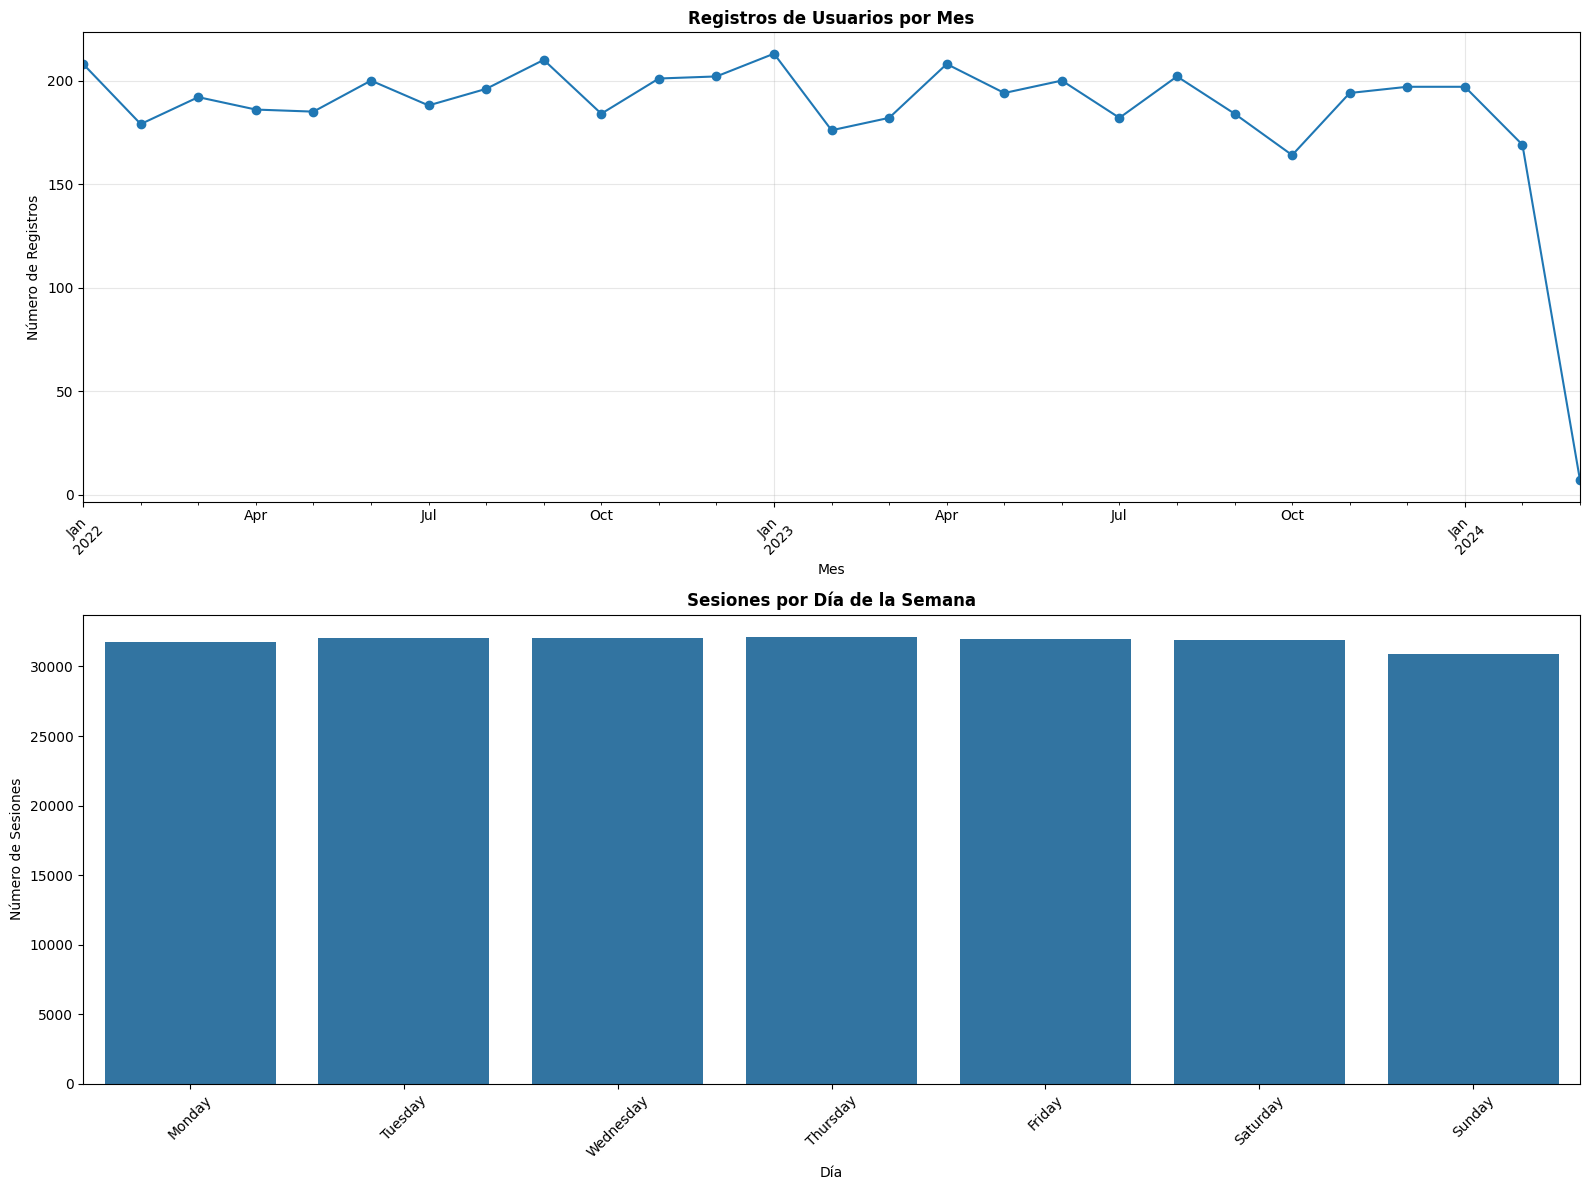

In [14]:
print("ANÁLISIS TEMPORAL")
print("="*60)

fig, axes = plt.subplots(2, figsize=(16, 12))

# Registros de usuarios por mes
df_users['registration_month'] = df_users['registration_date'].dt.to_period('M')
monthly_registrations = df_users.groupby('registration_month').size()

monthly_registrations.plot(kind='line', ax=axes[0], marker='o')
axes[0].set_title('Registros de Usuarios por Mes', fontweight='bold')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Número de Registros')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Sesiones por día de la semana
df_viewing['day_of_week'] = df_viewing['watch_date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sessions = df_viewing.groupby('day_of_week').size().reindex(day_order)

sns.barplot(x=daily_sessions.index, y=daily_sessions.values, ax=axes[1])
axes[1].set_title('Sesiones por Día de la Semana', fontweight='bold')
axes[1].set_xlabel('Día')
axes[1].set_ylabel('Número de Sesiones')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

1. User Registrations Per Month
* Stable Trend: The number of registrations remained largely stable over the two-year period, consistently fluctuating between approximately 170 and 210 registrations per month.
* Drop-off: There is a significant, sharp drop-off at the end of the period (likely the last recorded month in 2024, possibly January or the end of the data collection window), where registrations fall close to zero. This could indicate the end of the data collection or a technical issue.
2. Sessions Per Day of the Week
* Uniformity: Session activity is highly uniform across all seven days.

ANÁLISIS DE ENGAGEMENT Y COMPORTAMIENTO


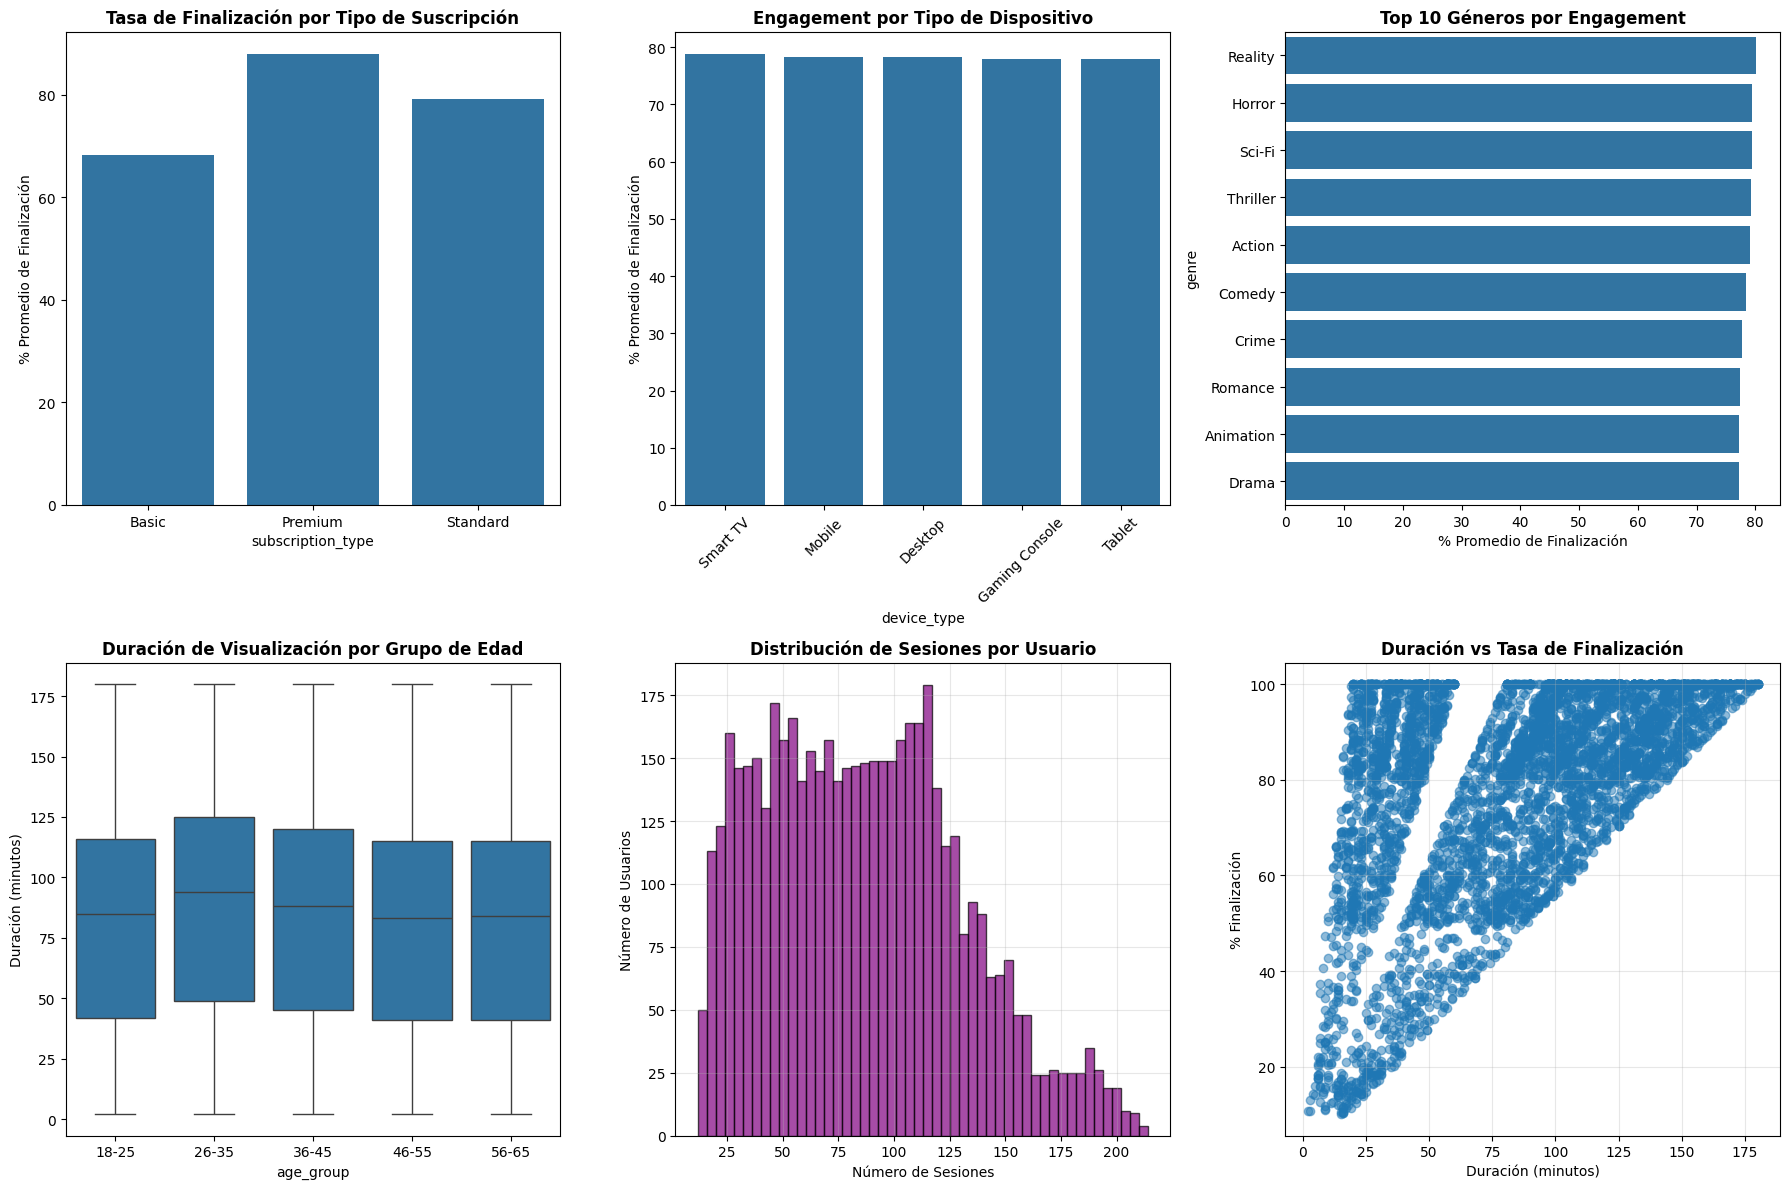

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Nota: La columna 'age_group' también se crea en df_main para el paso 4
age_bins = pd.cut(df_main['age'], bins=[17, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
df_main['age_group'] = age_bins

df_main = df_main.explode('genre')

print("ANÁLISIS DE ENGAGEMENT Y COMPORTAMIENTO")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Completion rate por tipo de suscripción
engagement_subscription = df_main.groupby('subscription_type')['completion_percentage'].agg(['mean', 'count'])
sns.barplot(x=engagement_subscription.index, y=engagement_subscription['mean'], ax=axes[0, 0])
axes[0, 0].set_title('Tasa de Finalización por Tipo de Suscripción', fontweight='bold')
axes[0, 0].set_ylabel('% Promedio de Finalización')

# 2. Engagement por dispositivo
device_engagement = df_main.groupby('device_type')['completion_percentage'].mean().sort_values(ascending=False)
sns.barplot(x=device_engagement.index, y=device_engagement.values, ax=axes[0, 1])
axes[0, 1].set_title('Engagement por Tipo de Dispositivo', fontweight='bold')
axes[0, 1].set_ylabel('% Promedio de Finalización')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Engagement por género de contenido (USANDO df_main_exploded)
genre_engagement = df_main.groupby('genre')['completion_percentage'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_engagement.values, y=genre_engagement.index, ax=axes[0, 2])
axes[0, 2].set_title('Top 10 Géneros por Engagement', fontweight='bold')
axes[0, 2].set_xlabel('% Promedio de Finalización')

# 4. Distribución de tiempo de visualización por edad (USANDO df_main)
# El 'age_group' se definió al inicio
sns.boxplot(data=df_main, x='age_group', y='watch_duration_minutes', ax=axes[1, 0])
axes[1, 0].set_title('Duración de Visualización por Grupo de Edad', fontweight='bold')
axes[1, 0].set_ylabel('Duración (minutos)')

# 5. Sesiones por usuario
sessions_per_user = df_main.groupby('user_id').size()
axes[1, 1].hist(sessions_per_user, bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1, 1].set_title('Distribución de Sesiones por Usuario', fontweight='bold')
axes[1, 1].set_xlabel('Número de Sesiones')
axes[1, 1].set_ylabel('Número de Usuarios')
axes[1, 1].grid(True, alpha=0.3)

# 6. Relación entre duración y completion rate
scatter_sample = df_main.sample(5000) # Muestrear para mejor visualización
axes[1, 2].scatter(scatter_sample['watch_duration_minutes'], 
                  scatter_sample['completion_percentage'], alpha=0.5)
axes[1, 2].set_title('Duración vs Tasa de Finalización', fontweight='bold')
axes[1, 2].set_xlabel('Duración (minutos)')
axes[1, 2].set_ylabel('% Finalización')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

1. Completion Rate by Subscription Type
This bar chart compares the Average Completion Percentage across different subscription_type categories:
* Premium subscribers have the highest completion rate, close to 85%.
2. Engagement by Device Type
This bar chart shows the Average Completion Percentage for different device_type categories:
* Uniform High Engagement: All device types show an extremely high and uniform completion rate, hovering around 80%.
* Conclusion: The type of device used (Smart TV, Mobile, Desktop, etc.) does not significantly influence the average content completion rate.
3. Top 10 Genres by Engagement
This chart ranks the top 10 genres based on their Average Completion Percentage:
* Uniform High Engagement: Similar to the device analysis, the top 10 genres all exhibit an extremely high and uniform completion rate, ranging from about 75% to 80%.
* Conclusion: For the most popular genres, the genre itself is not a strong differentiator of completion percentage, as users tend to complete nearly all content across these categories.
4. Watch Duration by Age Group
This boxplot compares the Watch Duration (in minutes) across five different age_group categories:
* Similar Distribution: All age groups show a very similar median and interquartile range (IQR) for watch duration. The median duration for all groups is approximately 90 minutes.
Conclusion: The age group of the user does not significantly impact the typical duration of a single viewing session. All groups have consistent viewing habits.
5. Distribution of Sessions Per Use
This histogram shows the distribution of the Number of Sessions per user:
* Right-Skewed: The distribution is right-skewed. The vast majority of users have a low to moderate number of sessions, clustering between approximately 25 and 150 sessions.
* Outliers: A small number of users have a very high number of sessions (up to 200), but they represent a declining tail of the distribution.
6. Duration vs. Completion Rate 
This scatter plot visualizes the relationship between Duration (in minutes) and % Completion:
* Bimodal/Clustered Pattern: The plot shows two main vertical clusters of data points:
    * A dense vertical line of points near Duration = 40 minutes (typical series duration).
    * A second dense vertical line of points near Duration = 100 to 150 minutes (typical movie duration).
* High Completion: In both clusters, the data points are spread across the entire range of % Completion (0% to 100%), but there is a heavy concentration of points at 100% completion across all durations.
* Conclusion: There is no clear linear correlation between the duration of the content and its completion rate. Content of both short and long duration is highly likely to be completed (hit 100% completion).



## Outlier Detection

DETECCIÓN DE OUTLIERS

Outliers en total_watch_time_hours:
   - Límite inferior: -297.44
   - Límite superior: 950.46
   - Total outliers: 6,670 (1.55%)
   - Rango de outliers: 950.70 - 1093.10

Outliers en watch_duration_minutes:
   - Límite inferior: -67.00
   - Límite superior: 229.00
   - Total outliers: 0 (0.00%)
   - Rango de outliers: nan - nan

Outliers en completion_percentage:
   - Límite inferior: 21.75
   - Límite superior: 140.55
   - Total outliers: 11,923 (2.77%)
   - Rango de outliers: 10.00 - 21.70


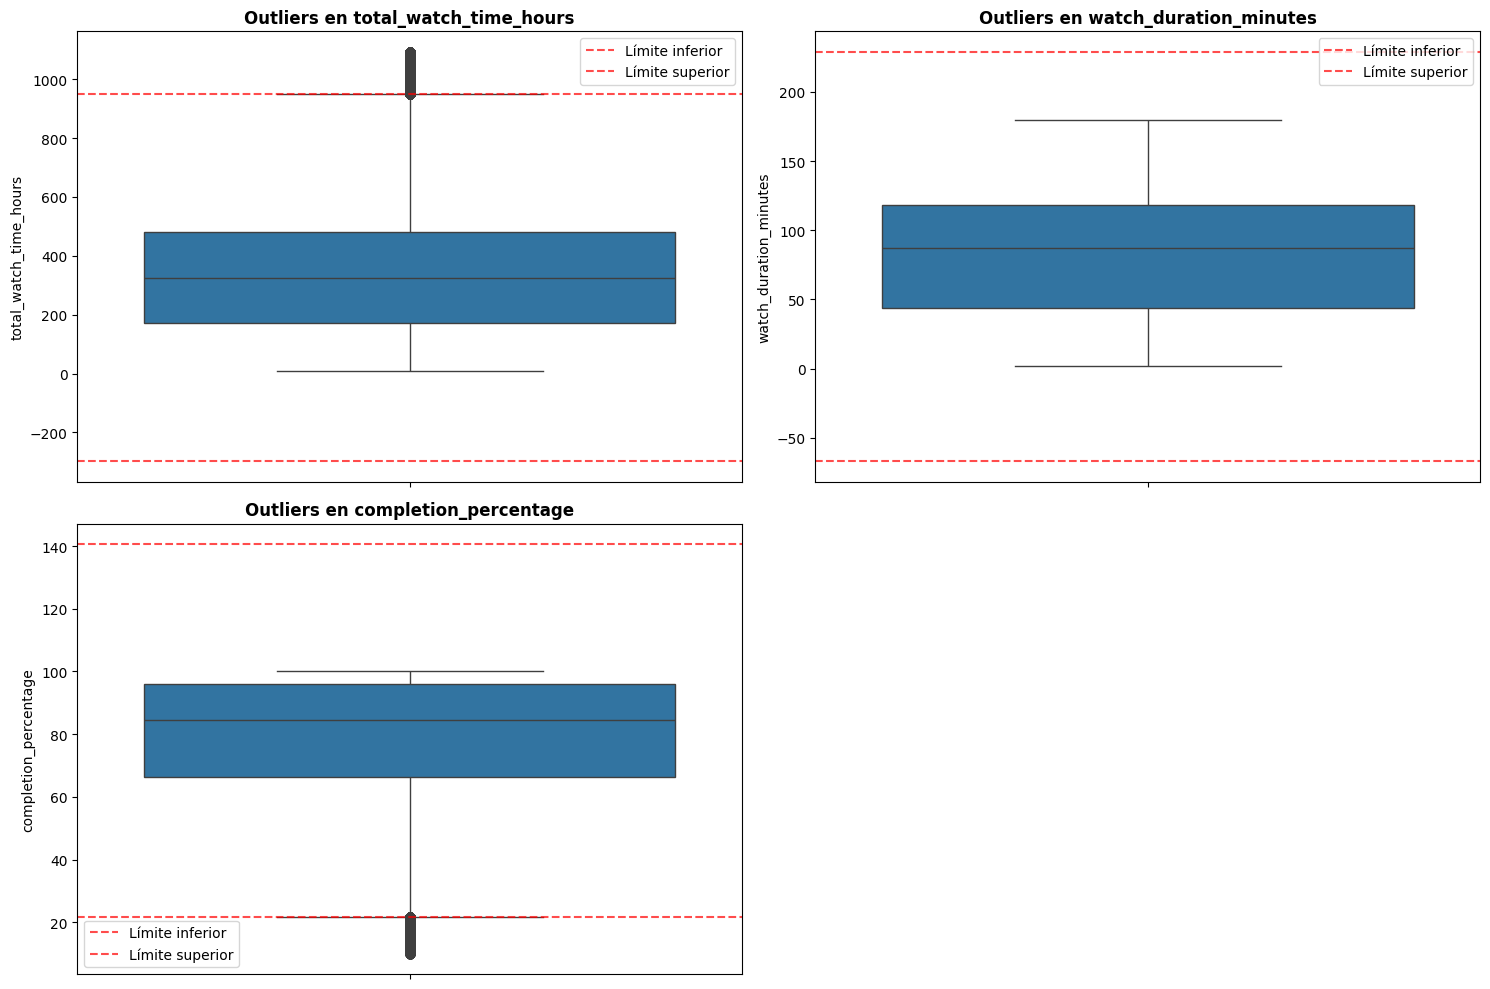

In [16]:
print("DETECCIÓN DE OUTLIERS")
print("="*60)

def identify_outliers(df, column, method='IQR'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"\nOutliers en {column}:")
    print(f"   - Límite inferior: {lower_bound:.2f}")
    print(f"   - Límite superior: {upper_bound:.2f}")
    print(f"   - Total outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"   - Rango de outliers: {outliers[column].min():.2f} - {outliers[column].max():.2f}")
    
    return outliers, lower_bound, upper_bound

# Variables para análisis de outliers
outlier_columns = ['total_watch_time_hours', 'watch_duration_minutes', 'completion_percentage']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(outlier_columns):
    if col in df_main.columns:
        # Identificar outliers
        outliers, lower, upper = identify_outliers(df_main, col)
        
        # Crear boxplot
        if i < len(axes):
            sns.boxplot(y=df_main[col], ax=axes[i])
            axes[i].set_title(f'Outliers en {col}', fontweight='bold')
            axes[i].set_ylabel(col)
            
            # Marcar límites
            axes[i].axhline(y=lower, color='r', linestyle='--', alpha=0.7, label='Límite inferior')
            axes[i].axhline(y=upper, color='r', linestyle='--', alpha=0.7, label='Límite superior')
            axes[i].legend()

axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


1. Outliers in total_watch_time_hours
* The outliers are all high-end values (above the upper limit), indicating a small group of users with exceptionally high total watch times. The lower limit is impossible (negative time), so no low-end outliers exist.
2. Outliers in watch_duration_minutes
* The data for individual session duration is very clean; there are no values considered extreme (either very short or very long) based on the IQR method.
3. Outliers in completion_percentage
* The outliers are all low-end values (below the lower limit), indicating sessions where users abandoned the content very quickly (completing less than 21.75% of it). Since completion cannot exceed 100%, the upper limit is irrelevant, and no high-end outliers are possible.

## Correlation Matrix

MATRIZ DE CORRELACIONES


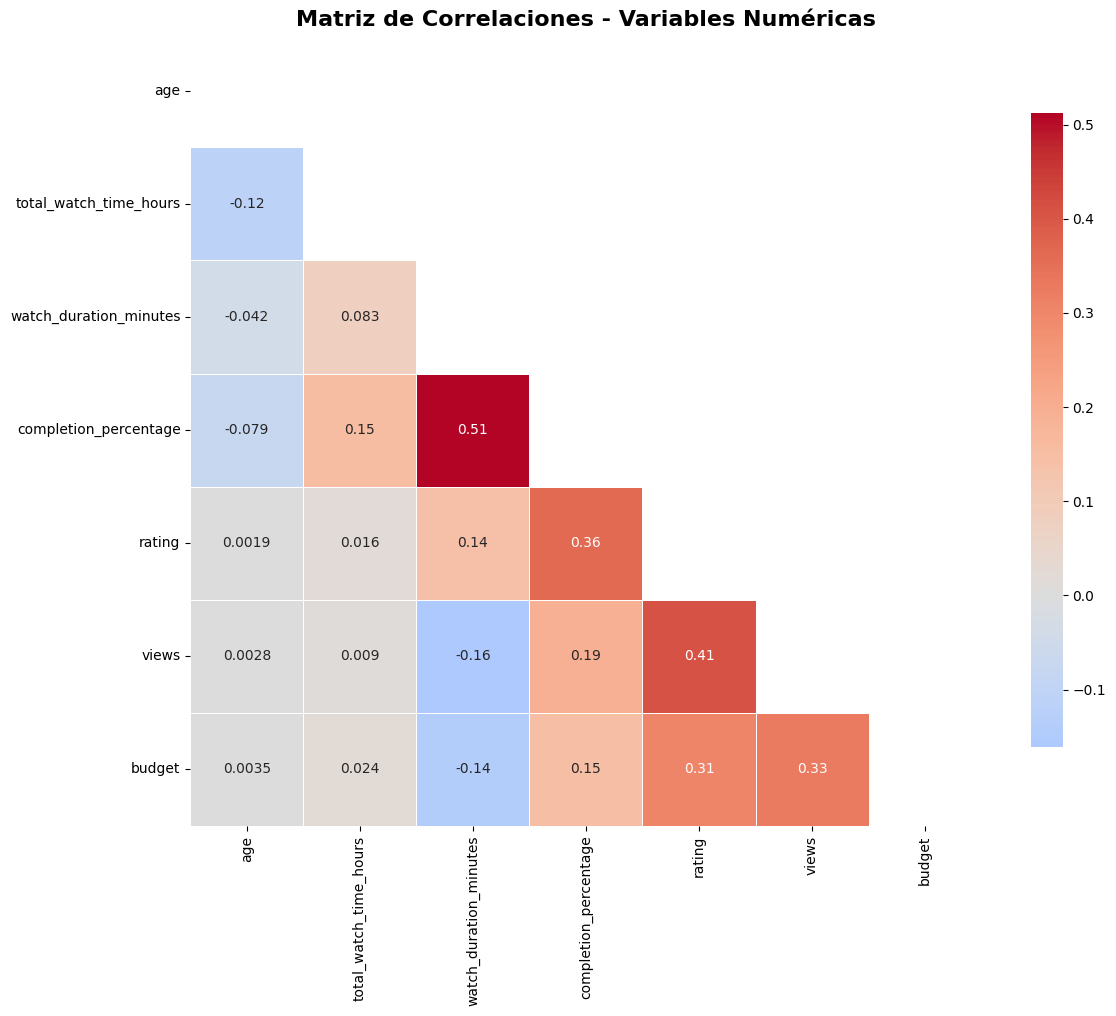


CORRELACIONES MÁS SIGNIFICATIVAS:
📈 watch_duration_minutes ↔ completion_percentage: 0.512
📈 rating ↔ views: 0.412
📈 completion_percentage ↔ rating: 0.364
📈 views ↔ budget: 0.326
📈 rating ↔ budget: 0.306
📈 completion_percentage ↔ views: 0.192
📉 watch_duration_minutes ↔ views: -0.161
📈 total_watch_time_hours ↔ completion_percentage: 0.154
📈 completion_percentage ↔ budget: 0.151
📉 watch_duration_minutes ↔ budget: -0.142


In [17]:
print("MATRIZ DE CORRELACIONES")
print("="*60)

numerical_vars = ['age', 'total_watch_time_hours', 'watch_duration_minutes', 
                  'completion_percentage', 'rating', 'views', 'budget']

correlation_data = df_main[numerical_vars].dropna()

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlaciones - Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCORRELACIONES MÁS SIGNIFICATIVAS:")
print("="*50)

# Obtener pares de correlaciones (sin duplicados y sin autocorrelaciones)
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= 0.1:  # Solo correlaciones >= 0.1
            correlation_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                corr_value
            ))

# Ordenar por valor absoluto de correlación
correlation_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

for var1, var2, corr in correlation_pairs[:10]:  # Top 10
    direction = "📈" if corr > 0 else "📉"
    print(f"{direction} {var1} ↔ {var2}: {corr:.3f}")


| Relationship | Coefficient | Relationship Type | Business Implication |
| :--- | :--- | :--- | :--- |
| **Duration vs. Completion** | **0.512** | **Strong Positive**  | Content duration (`watch_duration_minutes`) is strongly correlated with the completion rate (`completion_percentage`). This suggests that **users who start content, regardless of its length, are highly likely to finish it**, indicating strong content quality or user commitment. |
| **Rating vs. Views** | **0.412** | **Medium Positive**  | **Better-rated content** tends to receive a **higher number of views**. Content quality is a direct predictor of popularity. |
| **Views vs. Budget** | **0.326** | **Medium Positive**  | **Higher budget** content tends to have a **higher number of views**. This likely reflects better production quality and wider marketing. |
| **Duration vs. Views** | **-0.161** | **Weak Negative** | Longer content has a slight tendency to receive fewer total views. While weak, it hints at a minor preference for shorter content volume. |

## Conclusiones del Análisis Exploratorio

In [18]:
print("🎯 CONCLUSIONES CLAVE DEL ANÁLISIS EXPLORATORIO")
print("="*60)

# Conclusiones basadas en el análisis
conclusions = [
    "📊 ESTRUCTURA DE DATOS:",
    f"   • {len(df_users):,} usuarios registrados desde enero 2022 hasta marzo 2024",
    f"   • {len(df_viewing):,} sesiones de visualización registradas en 2024",
    f"   • {len(df_content):,} títulos de contenido ({len(df_movies)} películas, {len(df_series)} series)",
    "",
    "👥 PERFIL DE USUARIOS:",
    f"   • Edad promedio: {df_users['age'].mean():.1f} años (rango: {df_users['age'].min()}-{df_users['age'].max()})",
    f"   • Tiempo promedio de visualización: {df_users['total_watch_time_hours'].mean():.1f} horas",
    f"   • Distribución de suscripciones: {dict(df_users['subscription_type'].value_counts())}",
    "",
    "📱 COMPORTAMIENTO DE VISUALIZACIÓN:",
    f"   • Duración promedio por sesión: {df_viewing['watch_duration_minutes'].mean():.1f} minutos",
    f"   • Tasa promedio de finalización: {df_viewing['completion_percentage'].mean():.1f}%",
    f"   • Dispositivos más usados: {df_viewing['device_type'].value_counts().to_dict()}",
    "",
    "🎬 CONTENIDO:",
    f"   • Rating promedio películas: {df_movies['rating'].mean():.2f}",
    f"   • Rating promedio series: {df_series['rating'].mean():.2f}",
    f"   • Géneros más populares: {list(df_content['genre'].value_counts().head(3).index)}",
    "",
    "🔍 CALIDAD DE DATOS:",
    "   • Excelente calidad: sin valores nulos en datasets principales",
    "   • Joins exitosos: 100% de integridad referencial",
    "   • Outliers identificados en tiempo de visualización y completion rate",
    "",
    "📈 PATRONES TEMPORALES:",
    f"   • Pico de registros en {monthly_registrations.idxmax()}",
    f"   • Mayor actividad: {daily_sessions.idxmax()} con {daily_sessions.max():,} sesiones",
    "",
    "🎯 OPORTUNIDADES IDENTIFICADAS:",
    "   • Segmentar usuarios por engagement y comportamiento de visualización",
    "   • Optimizar recomendaciones basadas en géneros de mayor engagement",
    "   • Analizar patrones de retención por tipo de suscripción",
    "   • Investigar factores que influyen en completion rate"
]

for conclusion in conclusions:
    print(conclusion)

🎯 CONCLUSIONES CLAVE DEL ANÁLISIS EXPLORATORIO
📊 ESTRUCTURA DE DATOS:
   • 5,000 usuarios registrados desde enero 2022 hasta marzo 2024
   • 222,785 sesiones de visualización registradas en 2024
   • 300 títulos de contenido (200 películas, 100 series)

👥 PERFIL DE USUARIOS:
   • Edad promedio: 41.6 años (rango: 18-65)
   • Tiempo promedio de visualización: 335.0 horas
   • Distribución de suscripciones: {'Basic': np.int64(2003), 'Standard': np.int64(1783), 'Premium': np.int64(1214)}

📱 COMPORTAMIENTO DE VISUALIZACIÓN:
   • Duración promedio por sesión: 78.9 minutos
   • Tasa promedio de finalización: 78.4%
   • Dispositivos más usados: {'Smart TV': 79803, 'Mobile': 69847, 'Desktop': 31329, 'Tablet': 31287, 'Gaming Console': 10519}

🎬 CONTENIDO:
   • Rating promedio películas: 2.99
   • Rating promedio series: 2.94
   • Géneros más populares: [['Action'], ['Romance'], ['Crime']]

🔍 CALIDAD DE DATOS:
   • Excelente calidad: sin valores nulos en datasets principales
   • Joins exitosos: 

In [19]:
print("PREPARACIÓN DE DATOS PARA ANÁLISIS POSTERIORES")
print("="*60)

# Crear variables derivadas útiles para análisis futuros
df_main_clean = df_main.copy()

# 1. Variables de engagement
df_main_clean['high_engagement'] = df_main_clean['completion_percentage'] > df_main_clean['completion_percentage'].median()
df_main_clean['session_quality'] = pd.cut(df_main_clean['completion_percentage'], 
                                         bins=[0, 50, 80, 100], 
                                         labels=['Low', 'Medium', 'High'])

# 2. Variables temporales
df_main_clean['is_weekend'] = df_main_clean['watch_date'].dt.dayofweek >= 5
df_main_clean['hour_category'] = pd.cut(df_main_clean['watch_date'].dt.hour,
                                       bins=[0, 6, 12, 18, 24],
                                       labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                                       include_lowest=True)

# 3. Variables de contenido
df_main_clean['is_movie'] = df_main_clean['content_type'] == 'movie'
df_main_clean['high_rated_content'] = df_main_clean['rating'] > df_main_clean['rating'].median()

# 4. Variables de usuario
df_main_clean['heavy_user'] = df_main_clean['total_watch_time_hours'] > df_main_clean['total_watch_time_hours'].quantile(0.75)
df_main_clean['is_premium'] = df_main_clean['subscription_type'] == 'Premium'

# Crear métricas agregadas por usuario
user_metrics = df_main_clean.groupby('user_id').agg({
    'session_id': 'count',  # número de sesiones
    'watch_duration_minutes': ['mean', 'sum'],  # duración promedio y total
    'completion_percentage': 'mean',  # engagement promedio
    'high_engagement': 'mean',  # proporción de sesiones de alto engagement
    'is_weekend': 'mean',  # proporción de visualización en fin de semana
    'is_movie': 'mean',  # proporción de películas vs series
    'content_id': 'nunique'  # variedad de contenido consumido
}).round(2)

# Aplatar nombres de columnas
user_metrics.columns = ['_'.join(col).strip() if col[1] else col[0] for col in user_metrics.columns.values]
user_metrics = user_metrics.rename(columns={
    'session_id_count': 'total_sessions',
    'watch_duration_minutes_mean': 'avg_session_duration',
    'watch_duration_minutes_sum': 'total_session_minutes',
    'completion_percentage_mean': 'avg_completion_rate',
    'high_engagement_mean': 'high_engagement_rate',
    'is_weekend_mean': 'weekend_usage_rate',
    'is_movie_mean': 'movie_preference_rate',
    'content_id_nunique': 'content_variety'
})

# Unir con datos de usuario
user_final = df_users.merge(user_metrics, on='user_id', how='left')

print("Variables derivadas creadas:")
print(f"   • Dataset principal enriquecido: {df_main_clean.shape}")
print(f"   • Métricas agregadas por usuario: {user_final.shape}")
print(f"   • Nuevas variables: {len(df_main_clean.columns) - len(df_main.columns)} variables categóricas")

# Mostrar resumen de nuevas variables
print(f"\nResumen de variables derivadas:")
derived_vars = ['high_engagement', 'session_quality', 'is_weekend', 'hour_category', 
                'is_movie', 'high_rated_content', 'heavy_user', 'is_premium']

for var in derived_vars:
    if var in df_main_clean.columns:
        if df_main_clean[var].dtype == 'bool':
            print(f"   • {var}: {df_main_clean[var].sum():,} True / {(~df_main_clean[var]).sum():,} False")
        else:
            print(f"   • {var}: {dict(df_main_clean[var].value_counts())}")

# Guardar datasets procesados para análisis posteriores
print(f"\nGuardando datasets procesados...")
df_main_clean.to_csv('Data/processed/main_dataset_clean.csv', index=False)
user_final.to_csv('Data/processed/user_metrics_aggregated.csv', index=False)

print("Datasets guardados en Data/processed/")
print("   • main_dataset_clean.csv - Dataset principal con variables derivadas")
print("   • user_metrics_aggregated.csv - Métricas agregadas por usuario")

PREPARACIÓN DE DATOS PARA ANÁLISIS POSTERIORES
Variables derivadas creadas:
   • Dataset principal enriquecido: (430688, 29)
   • Métricas agregadas por usuario: (5000, 15)
   • Nuevas variables: 8 variables categóricas

Resumen de variables derivadas:
   • high_engagement: 214,988 True / 215,700 False
   • session_quality: {'High': np.int64(257413), 'Medium': np.int64(130828), 'Low': np.int64(42447)}
   • is_weekend: 121,688 True / 309,000 False
   • hour_category: {'Night': np.int64(430688), 'Morning': np.int64(0), 'Afternoon': np.int64(0), 'Evening': np.int64(0)}
   • is_movie: 314,858 True / 115,830 False
   • high_rated_content: 213,958 True / 216,730 False
   • heavy_user: 107,588 True / 323,100 False
   • is_premium: 135,158 True / 295,530 False

Guardando datasets procesados...
Datasets guardados en Data/processed/
   • main_dataset_clean.csv - Dataset principal con variables derivadas
   • user_metrics_aggregated.csv - Métricas agregadas por usuario
